# 그래프를 추천시스템에 어떻게 활용할까? (심화)

## 복습용 질문거리

## 강의소개
- 추천 시스템에 대해 복습
- 잠재 인수 모형(Latent Factor Model)
- 넷플릭스 챌린지
- 잠재 인수 모형을 활용한 추천 시스템에 대하여 소개

## Further Questions
- 추천시스템의 성능을 측정하는 metric이 RMSE라는 것은 예상 평점이 높은 상품과 낮은 상품에 동일한 페널티를 부여한다는 것을 뜻합니다. 하지만 실제로 추천시스템에서는 내가 좋아할 것 같은 상품을 추천해주는것, 즉 예상 평점이 높은 상품을 잘 맞추는것이 중요합니다. 이를 고려하여 성능을 측정하기 위해서는 어떻게 해야 할까요?
    - 사용자의 평균 평점을 빼고 Relu를 적용시켜주면 어떨까? 좋아하지 않는 것은 그냥 0으로만 예측하면 되고 평균보다 높은 것만 예측하면 되니깐? 근데 이러면 안좋아하는 것도 점수를 높에 받을지도 모르는 걸까?
- 추천 시스템의 성능을 향상시키기 위해서는 어떠한 것을 더 고려할 수 있을까요? (해당 문제는 정답이 제공되지 않는 문제입니다. 자유롭게 여러분의 의견을 이야기해보세요.)
    - 트렌스포머가 좋다고 하는데 어떻게 적용시켜보면 어떨까?

## 목차
---
1. 추천시스템 기본 복습
    - 내용 기반 추천, 협업 필터링 등
2. 넷플릭스 챌린지 소개
3. 기본 잠재 인수 모형
    - 사용자 임베딩, 상품 임베딩을 학습
    - 임베딩의 내적으로 평점을 근사
4. 고급 잠재 인수 모형
    - 사용자 편향, 상품 편향, 시간적 편향을 고려
5. 넷플릭스 챌린지의 결과
6. 실습 : Surprise 라이브러리와 잠재 인수 모형의 활용

## 추천시스템 기본 복습
---
- 추천시스템 예시
    - Amazon 상품, 넷플릭스 영화, 유튜브 영상, 페이스북 친구
- 추천시스템과 그래프
    - 사용자 각각이 구매할만한? 선호할만한 상품을 추천하는 것
    - 사용자별 구매나 선호를 예측하는 것
    - 미래의 간선을 예측하는 문제, 누락된 가중치를 추정하는 문제
- 내용 기반 추천시스템
    - 사용자가 구매, 만족했던 상품과 유사한 것을 추천하는 방법
    - 장점
        - 다른 사용자의 구매기록 필요없음
        - 독특한 취향 사용자 추천가능
        - 새상품 추천가능
        - 추천이유 제공 가능
    - 단점
        - 상품에 대한 부가 정보가 없는 경우 사용 불가
        - 구매기록이 없는 사용자 사용 불가
        - 과적합으로 지나치게 협소한 추천을 할 위험이 있음
- 협업 필터링
    - 유사한 취향의 사용자들이 선호/구매한 상품을 추천하는 방법
    - 장점
        - 상품에 대한 부가 정보가 없는 경우에도 사용할 수 있음
    - 단점
        - 충분한 수의 평점 데이터가 누적 되어야 효과적
        - 새상품, 새로운 사용자에 대한 추천이 불가능
        - 독특한 취향의 사용자에게 추천이 어려움
- 추천시스템 평가
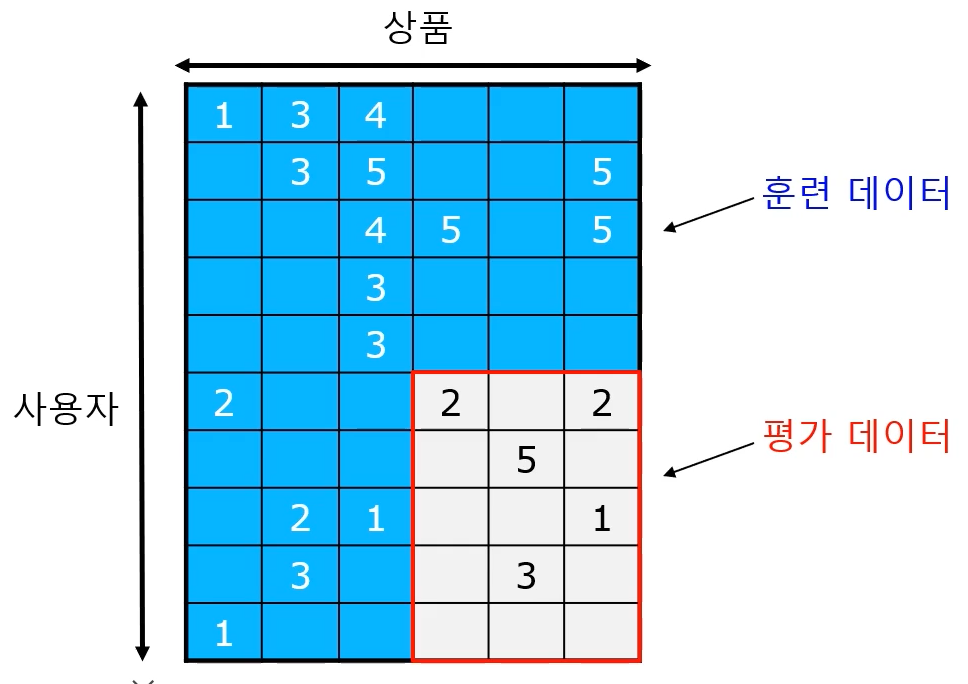
    - MSE, RMSE를 이용해서 오차를 측정

## 넷플릭스 챌린지
---
- 사용자별 영화 평점 데이터 사용됨
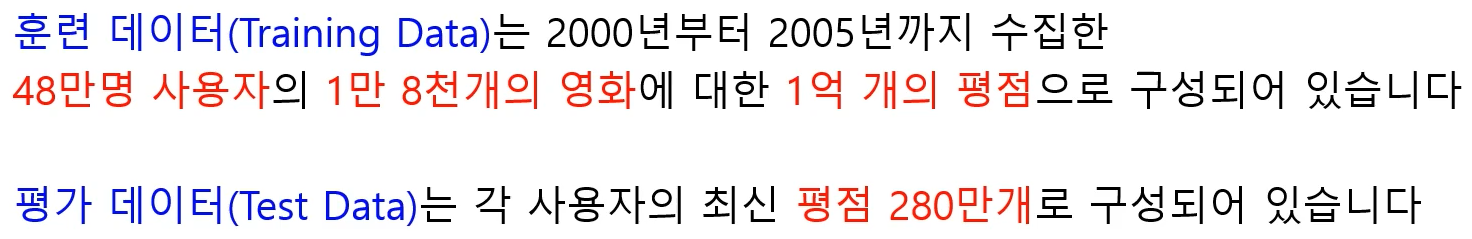
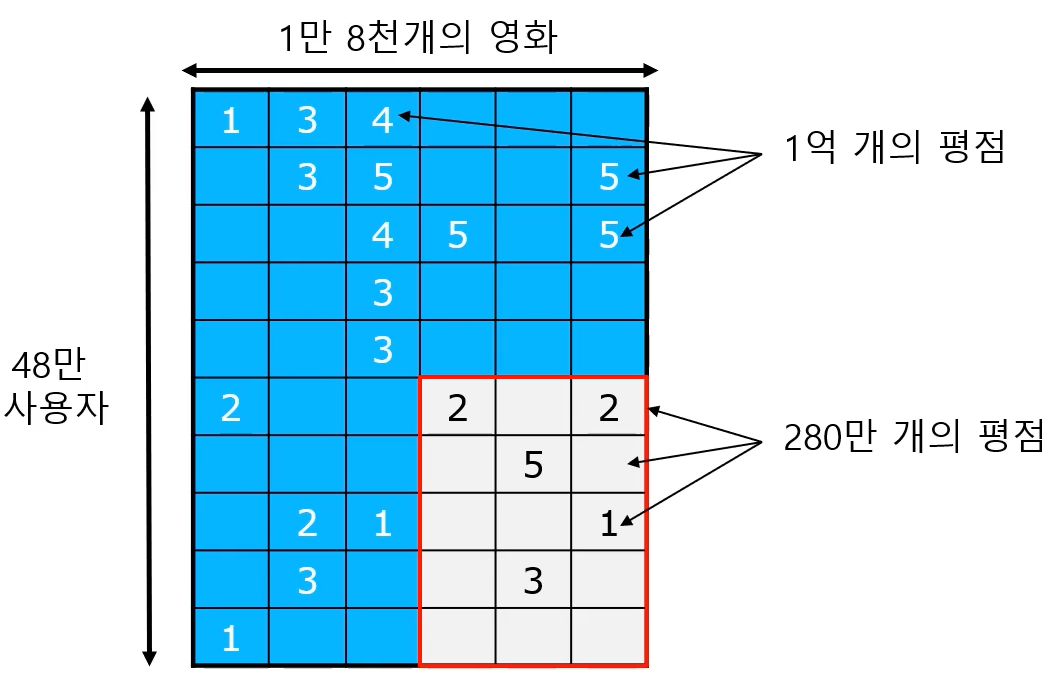
- 목표 : 추천시스템 성능 10%이상 향상
    - 평균제곱근 오차 0.9514 에서 0.8563으로 낮추는 것
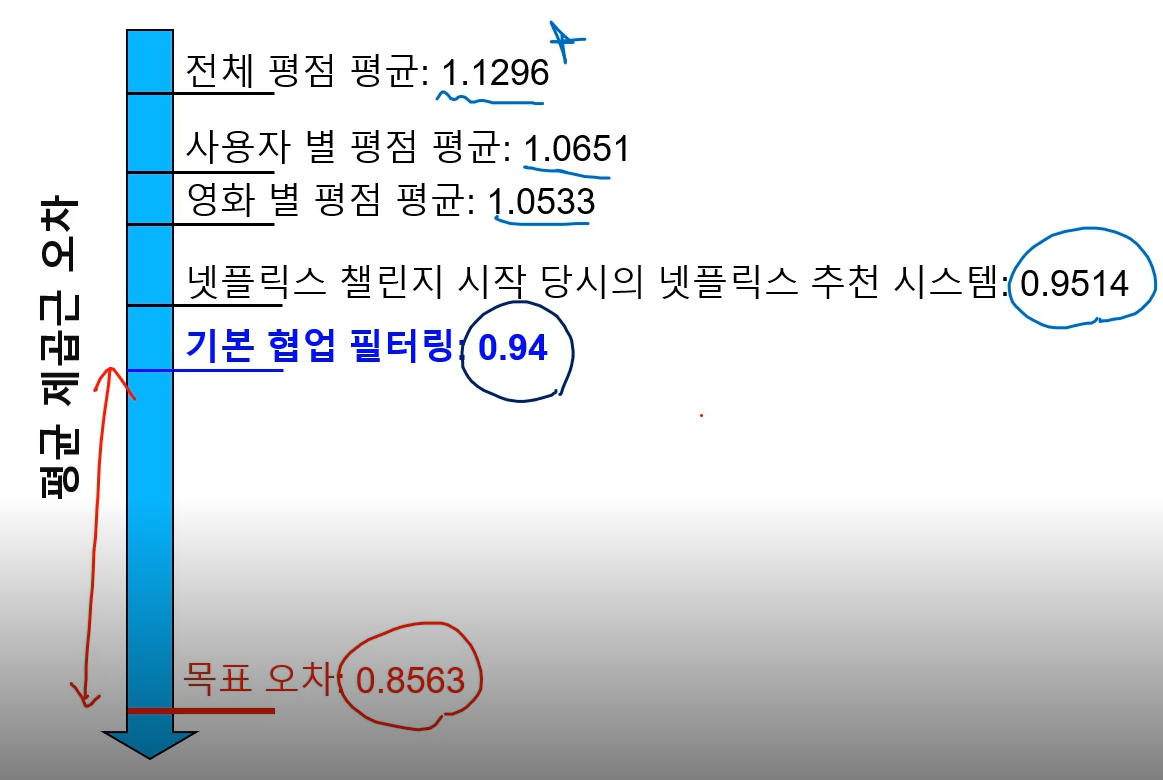

## 잠재인수 모형
---
- 잠재 인수 모형 개요 (Latent Factor Model, UV decomposition, SVD, 여러가지 이름으로 불림)
    - 사용자와 상품을 벡터로 표현하는 것(정점 임베딩)
    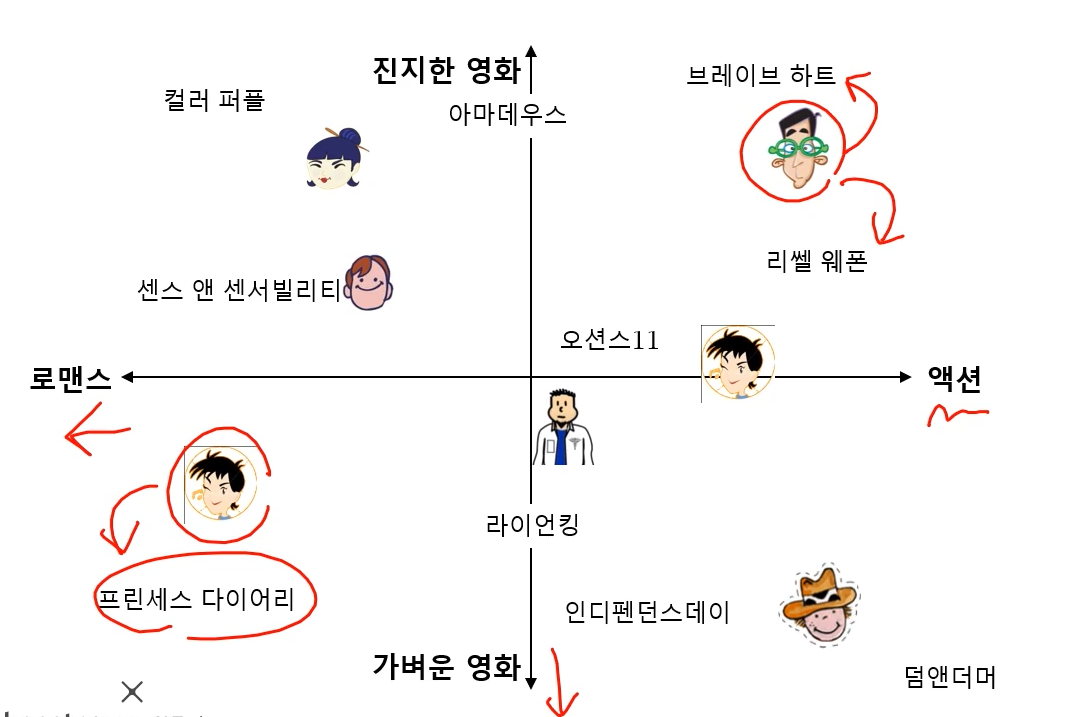
    - 영화를 얼마나 엑션인지, 로맨스인지, 진지한지 아닌지를 평가하기가 어려움
        - 그래서 잠재 인수라고 둠 (Latent Factor)
- 손실함수
    - 사용자와 상품의 임베딩 내적이 평점과 최대한 유사하도록 하는 것
    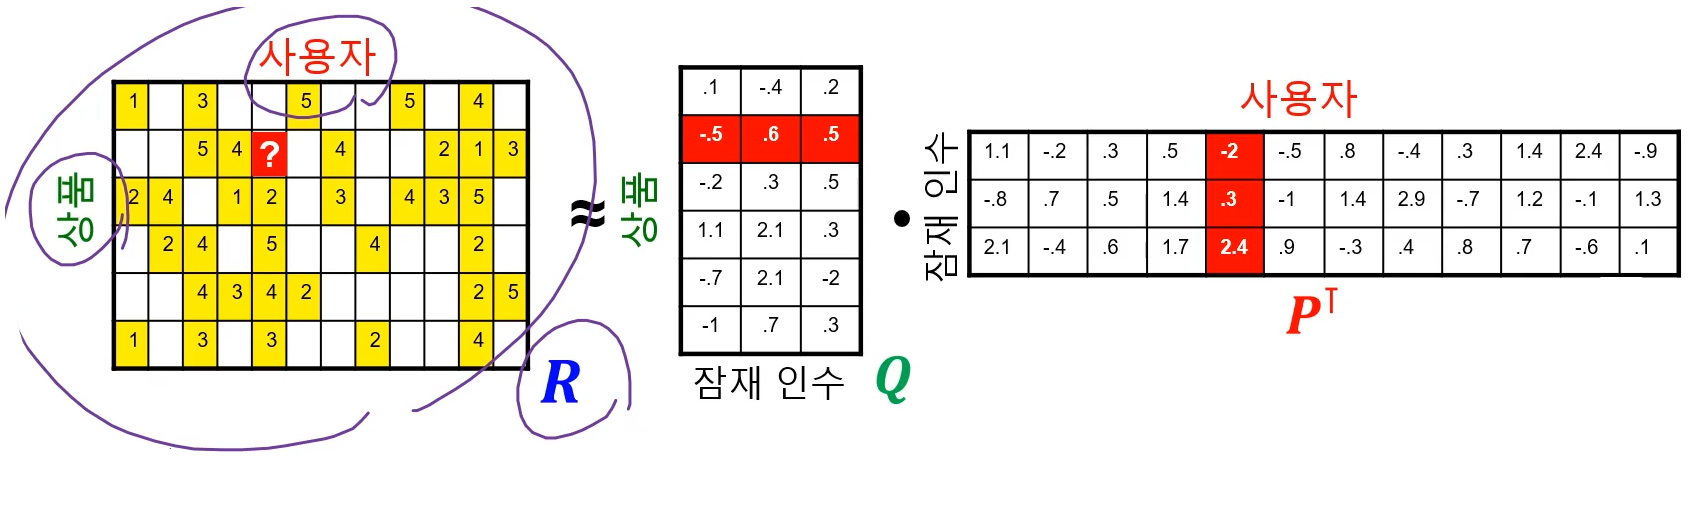
    - 손실함수를 최소화
    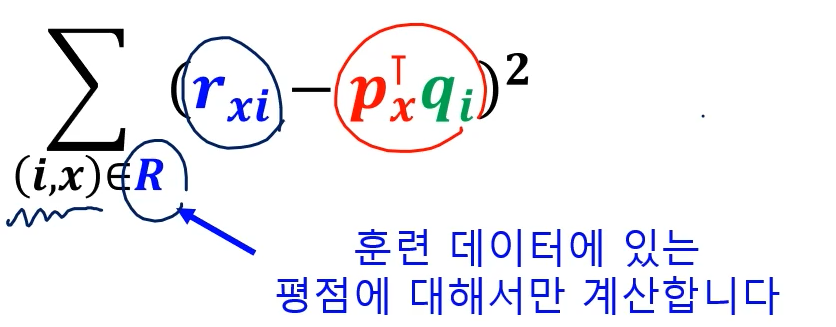
    - 과적합이 발생할 수 있기 때문에 정규화 항을 손실함수에 더해줌
    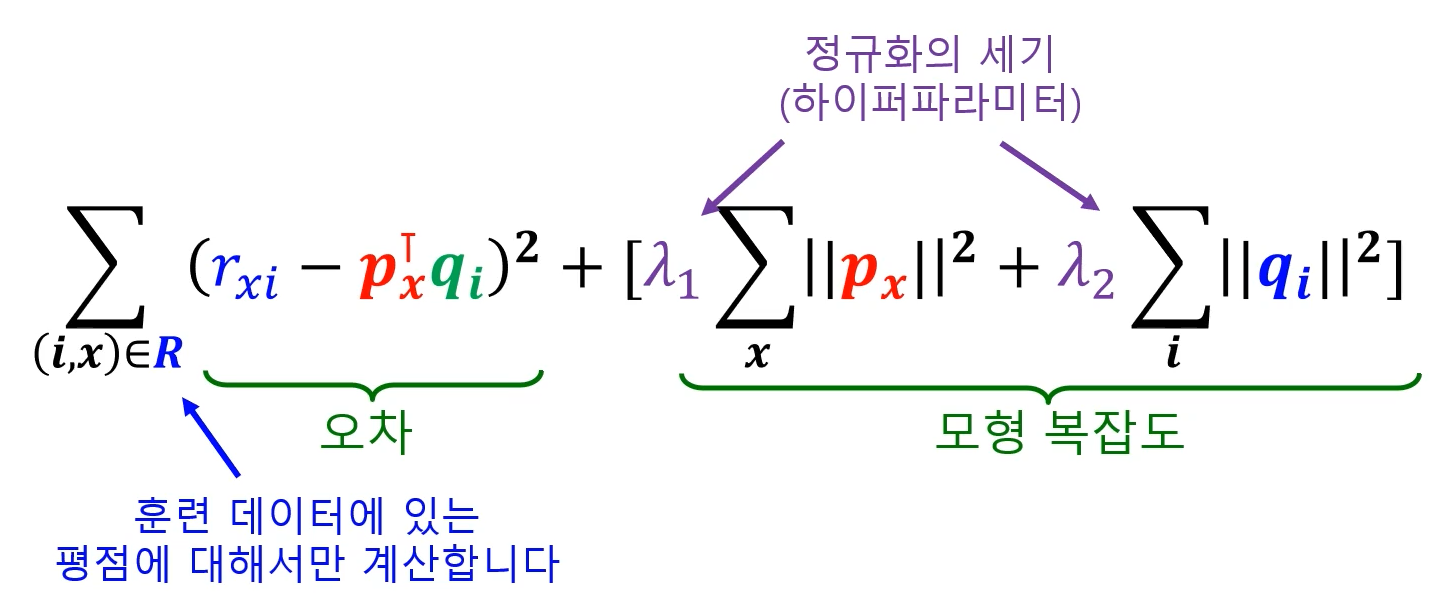
    - 정규화는 원점에서 너무 멀어지는 것을 막아서 다시 불러드리는 역할을 한다고 볼 수 있음
- 최적화
    - 손실함수를 최소화 하는 P와 Q를 찾기위해서는 SGD(스토케스틱 그레디언트 디센트)를 사용함
    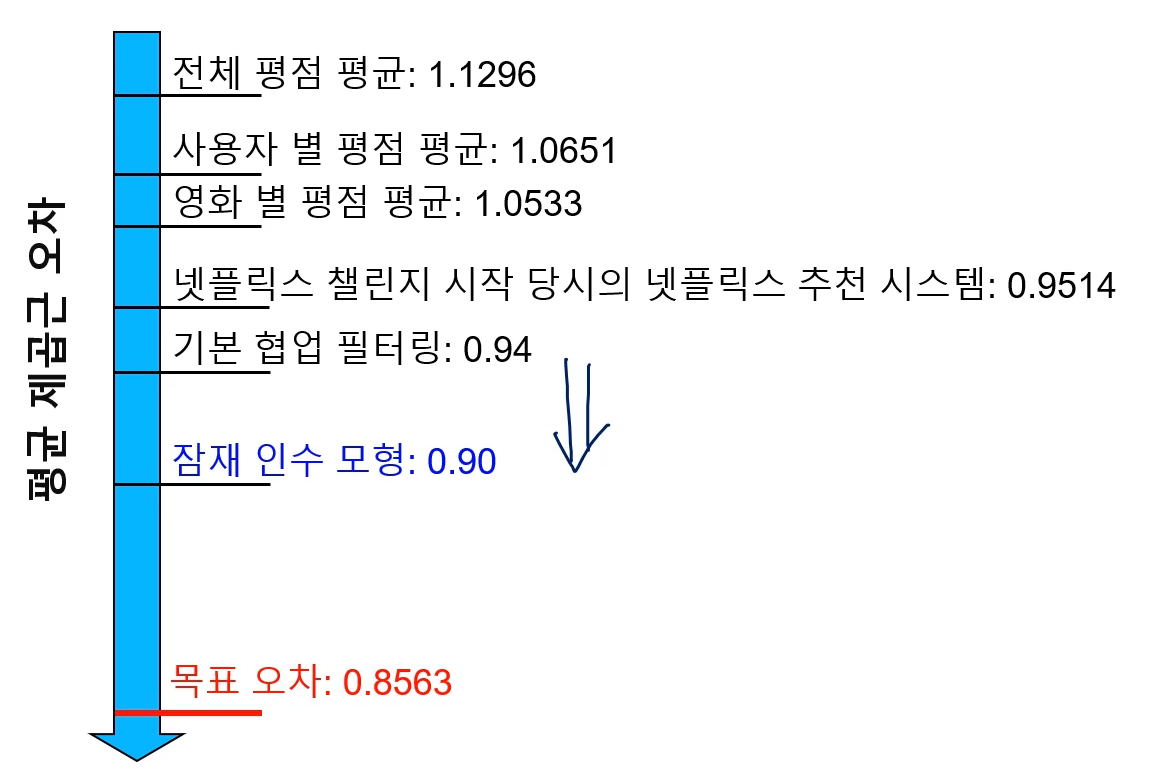
    - 하지만 여전히 부족함

## 고급 잠재 인수 모형
---
- 사용자와 상품의 편향을 고려한 잠재인수 모형
    - 사용자의 편향 : 해당 사용자의 평점 평균과 전체 평정 평균의 차
        - 나연이는 평균 4.0, 다현은 평균 3.5를 주었다고가정
        - 전체 평균이 3.7이라면
        - 나현의 편향은 0.3, 다현은 편향이 -0.2가 됨
    - 상품의 편향 : 해당 상품의 평점 평균과 전체 평균의 차
    - 평점을 전체평균, 사용자 편향, 상품편향, 상호작용으로 분리해서 고려
    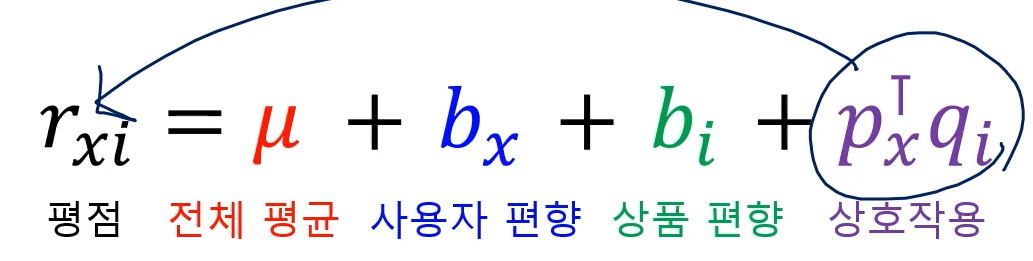
    - 손실함수 ?
        - 아래의 +로 있는 부분은 정규화 항임(과적합 방지)
        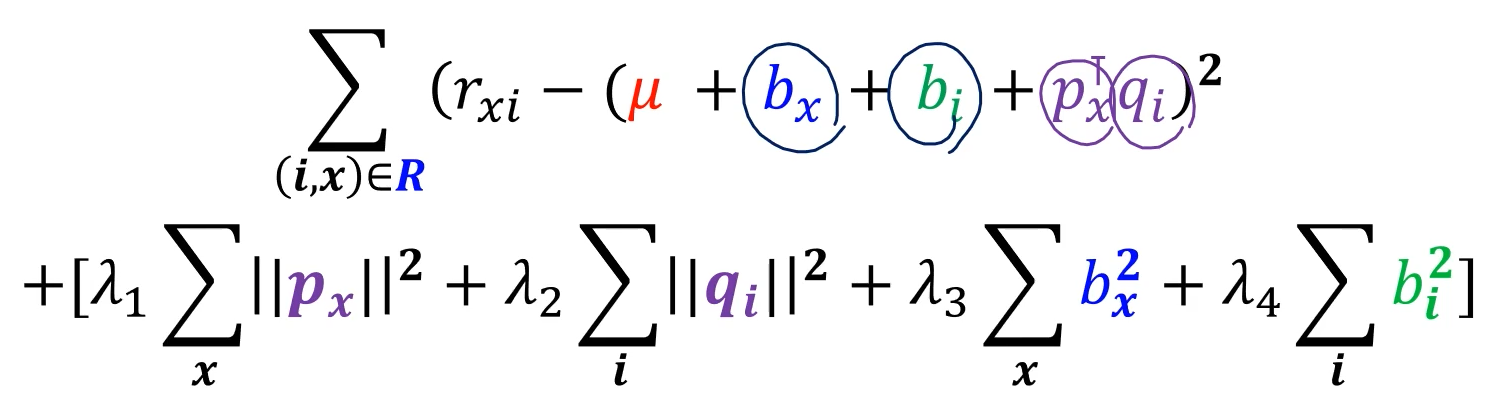
        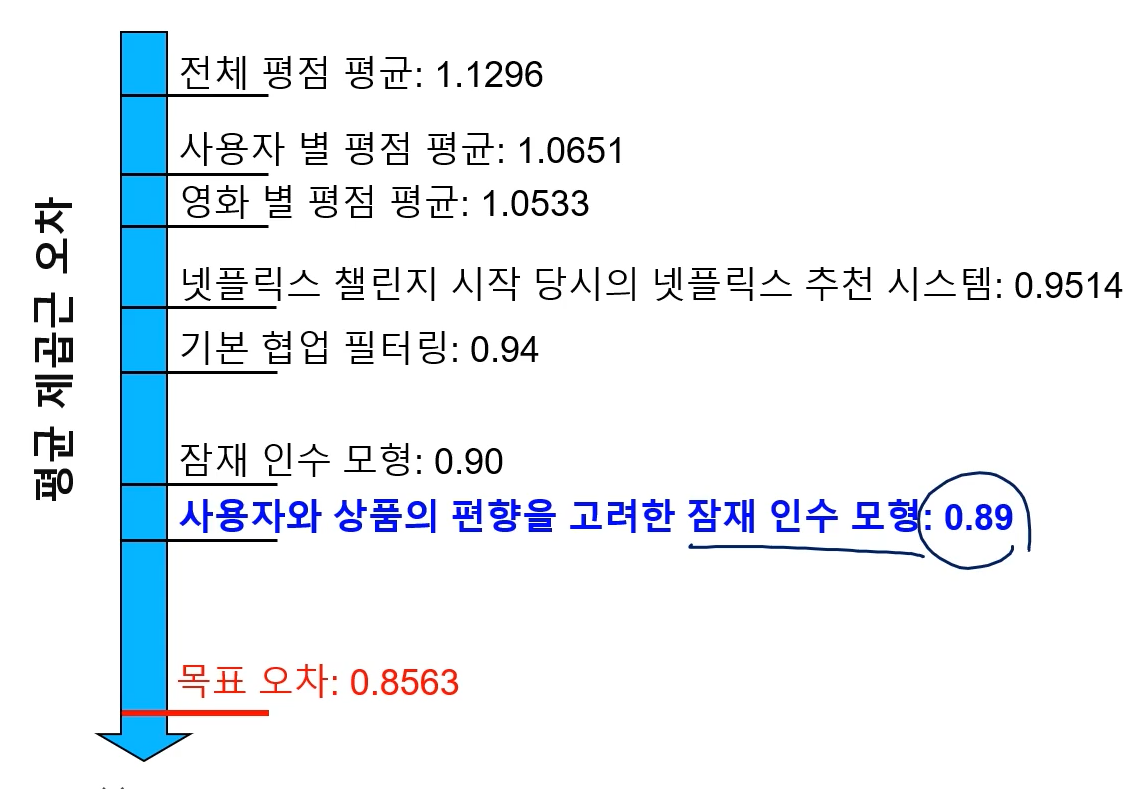
- 시간에 따른 편향을 고려한 잠재인수 모형
    - 넷플릭스 시스템의 변화로 평균 평점이 크게 상상하는 사건
    - 출시일 이후 시간이 지나면서 상승하는 경향이 있음
    - 사용자 편향과 상품 편향을 시간에 따른 함수로 가정
    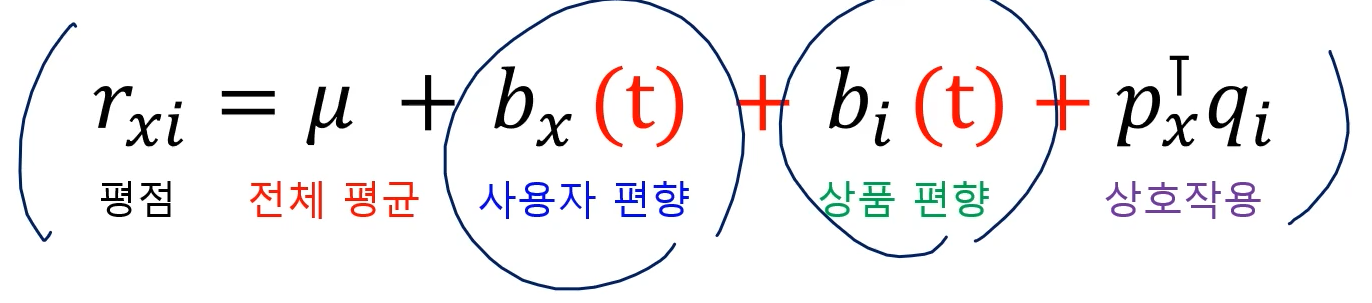
    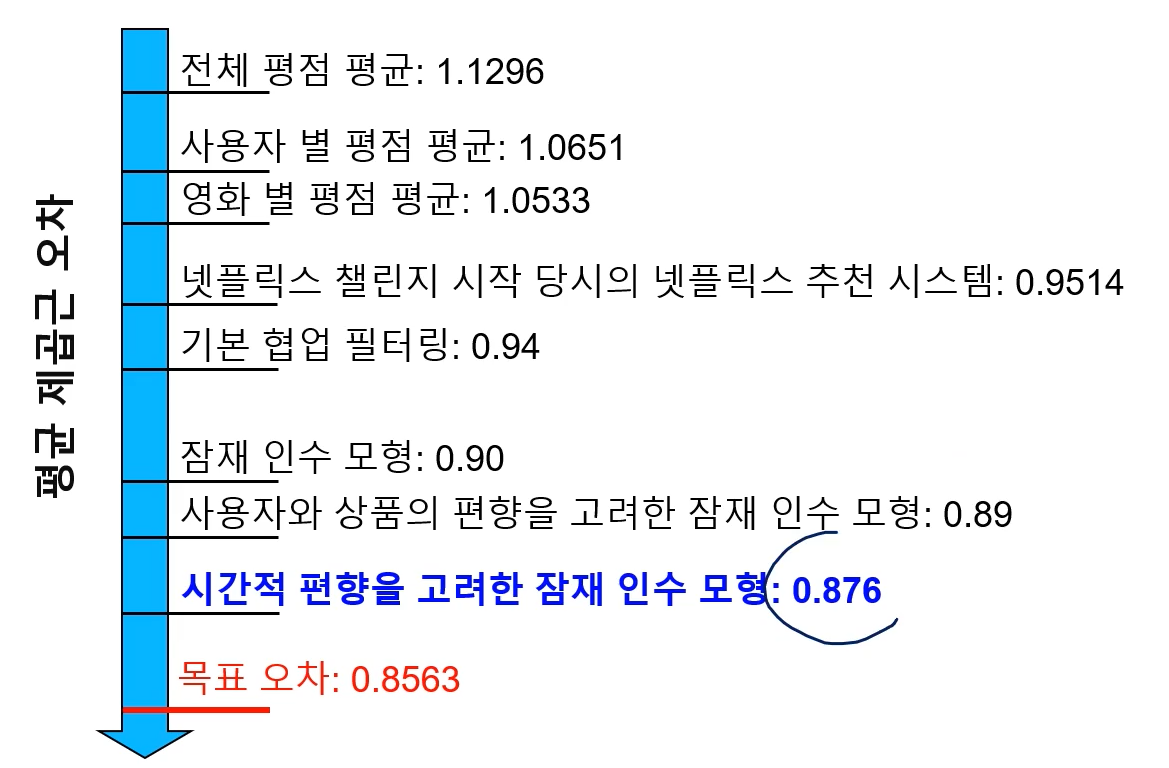

## 넷플릭스 챌린지 결과
---
- BellKor팀이 앙상블을 사용해서 처음 목표 성능에 도달
- 연합팀 Ensemble을 만들어 도달함
- 오차는 정확히 동일했지만 20분 빨리 제출 했기 때문에 BellKor 팀이 우승